# Preprocessing

In [7]:
## Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
# other libraries
import numpy as np
from sklearn.model_selection import cross_val_score
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
## Load data
X = np.load('data/phase1/samples.npy')
y = np.load('data/phase1/labels.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

# Tree

In [3]:
## Instantiate model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=55, max_leaf_nodes=28, min_impurity_decrease=0, min_samples_leaf=2)

In [4]:
## Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=55,
                       max_leaf_nodes=28, min_impurity_decrease=0,
                       min_samples_leaf=2)

In [5]:
clf.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

[Text(167.4, 195.696, 'X[45] <= 0.4\nentropy = 0.836\nsamples = 2650\nvalue = [1945, 705]'),
 Text(83.7, 152.208, 'X[93] <= 0.582\nentropy = 0.931\nsamples = 1481\nvalue = [967, 514]'),
 Text(41.85, 108.72, 'X[117] <= 0.566\nentropy = 0.736\nsamples = 691\nvalue = [548, 143]'),
 Text(20.925, 65.232, 'X[25] <= 0.12\nentropy = 0.917\nsamples = 250\nvalue = [167, 83]'),
 Text(10.4625, 21.744, 'entropy = 0.807\nsamples = 190\nvalue = [143, 47]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.971\nsamples = 60\nvalue = [24, 36]'),
 Text(62.775000000000006, 65.232, 'X[1] <= 6.5\nentropy = 0.574\nsamples = 441\nvalue = [381, 60]'),
 Text(52.3125, 21.744, 'entropy = 0.514\nsamples = 419\nvalue = [371, 48]'),
 Text(73.2375, 21.744, 'entropy = 0.994\nsamples = 22\nvalue = [10, 12]'),
 Text(125.55000000000001, 108.72, 'X[116] <= 0.436\nentropy = 0.997\nsamples = 790\nvalue = [419, 371]'),
 Text(104.625, 65.232, 'X[89] <= 0.494\nentropy = 0.762\nsamples = 172\nvalue = [134, 38]'),
 Text(94.162500

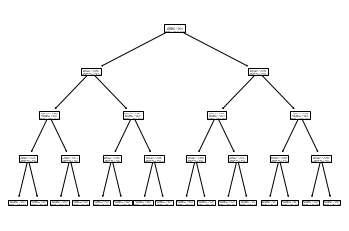

In [8]:
import matplotlib as plt

features = ['race', 'age']
for i in range(68):
    features.append('x' + str(i))
    features.append('y' + str(i))

label_names = ['cchs', 'control']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)

plot_tree(clf, feature_names=features, class_names=label_names, filled=True)

# Imbalanced dataset

In [15]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import torch

In [2]:
X = torch.from_numpy(np.load('data/phase1/samples.npy'))
y = torch.from_numpy(np.load('data/phase1/labels.npy'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y)

In [5]:
print("Count of 1 class in training set before upsampling :" ,format(sum(y_train==1))) # cchs
print("Count of 0 class in training set before upsampling :",format(sum(y_train==0))) # control

Count of 1 class in training set before upsampling : 705
Count of 0 class in training set before upsampling : 1945


In [16]:
model = LogisticRegression(C=0.001, penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Joker\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.9152542372881356
[[207   9]
 [ 16  63]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       216
         1.0       0.88      0.80      0.83        79

    accuracy                           0.92       295
   macro avg       0.90      0.88      0.89       295
weighted avg       0.91      0.92      0.91       295



In [12]:
smote = SMOTE(sampling_strategy = 1 ,k_neighbors = 3, random_state=1)   

X_train_new, y_train_new = smote.fit_resample(X_train, y_train.ravel())

print("Count of 1 class in training set after upsampling  :" ,(sum(y_train_new==1)))

print("Count of 0 class in training set after upsampling  :",(sum(y_train_new==0)))

Count of 1 class in training set after upsampling  : 1945
Count of 0 class in training set after upsampling  : 1945


In [17]:
model = LogisticRegression(C=0.001, penalty='none', solver='newton-cg')
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\Joker\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


0.9050847457627119
[[194  22]
 [  6  73]]
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       216
         1.0       0.77      0.92      0.84        79

    accuracy                           0.91       295
   macro avg       0.87      0.91      0.89       295
weighted avg       0.92      0.91      0.91       295



C:\Users\Joker\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Joker\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
